决策树算法
===
决策树是分类算法,但是决策树也可以用于求解回归问题，包括ID3、C4.5、C5.0和CART四种算法，前三种属于一种方法的不同改进版本（机器学习的人研究出来的）

# 1.基本概念
![images](images/04_001.png)
- 根节点：一颗决策树只有一个根节点
- 叶节点：代表一个类别
- 中间结点：代表在一个属性上的测试
- 分支：代表一个测试输出

# 2.决策树的分类过程
利用决策树进行分类的过程，其实就是构造树的过程。根据构造子树根节点的不同以及剪枝的不同，可以分为ID3，C4.5，C5.0和CART方法。
- ID3： 采用信息增益来划分子树、没有修剪、处理离散特征,基于奥卡姆剃刀原理,(Iterative Dichotomiser 3，迭代二叉树3代)
- C4.5：采用信息增益率划分子树、悲观剪枝法、处理离散和连续特征--主流算法
- C5.0：采用信息增益率划分子树、自适应增强
- CART：采用基尼指数划分子树、代价复杂度剪枝法，处理离散和连续特征--主流算法

# 3.举例
![images](images/04_002.png)

我们采用信息增益来划分子树，所以必须要计算每个特征的信息增益，那么就要求计算条件熵和熵

## 3.1.计算熵
总共有17条记录，类别为1的有8条，类别为0的有9条，所以
$$
\begin{eqnarray}
P(label=1) &=& \frac{8}{17} = 0.470588235\\
P(label=0) &=& \frac{9}{17} = 0.529411765\\
Info(label)&=& -(0.470588235 * log_2{0.470588235} + 0.529411765 * log_2{0.529411765} = 0.997502546
\end{eqnarray}
$$

## 3.2.计算每个特征的条件熵以及信息增益
### 3.2.1.离散性变量
color,root,knocks,texture,navel,touch这六个特征是离散型的

#### 3.2.1.1.color特征
##### 3.2.1.1.1.dark_green
其中数据集中包含dark_green的记录有6条，所以$P(color=dark-green)=\frac{6}{17}$,类别为1的有3条，类别为0的有3条，所以
$$
\begin{eqnarray}
P(label=1|color=dark-green) &=& \frac{3}{6} = 0.5\\
P(label=0|color=dark-green) &=& \frac{3}{6} = 0.5\\
H(color=dark-green) &=& -(0.5 * log_2{0.5} + 0.5 * log_2{0.5}) * \frac{6}{17} = 0.352941176
\end{eqnarray}
$$

##### 3.2.1.1.2.black
其中数据集中包含black的记录有6条，所以$P(color=black)=\frac{6}{17}$,类别为1的有4条，类别为0的有2条，所以
$$
\begin{eqnarray}
P(label=1|color=black) &=& \frac{4}{6} = 0.666666667\\
P(label=0|color=black) &=& \frac{2}{6} = 0.333333333\\
H(color=black) &=& -(0.67 * log_2{0.67} + 0.337 * log_2(0.337)) * \frac{6}{17} = 0.324104412
\end{eqnarray}
$$

##### 3.2.1.1.3.light_white
其中数据集中包含light_white的记录有5条，所以$P(color=light-white)=\frac{5}{17}$,类别为1的有1条，类别为0的有4条，所以
$$
\begin{eqnarray}
P(label=1|color=light-white) &=& \frac{1}{5} = 0.2\\
P(label=0|color=light-white) &=& \frac{4}{5} = 0.8\\
H(color=light-white) &=& -(0.2 * log_2{0.2} + 0.8 * log_2{0.8}) * \frac{5}{17} = 0.212331793
\end{eqnarray}
$$
所以条件熵:$H(color) = 0.352941176 + 0.324104412 + 0.212331793 = 0.889377381$<br/>
信息增益:$Gain(color)=0.997502546 - 0.889377381 = 0.108125165$

#### 3.2.1.2.其它离散变量的条件熵和信息增益
$$
\begin{eqnarray}
H(root) &=& 0.449145413 + 0.405682174 + 0 = 0.854827587\\
Gain(root) &=& 0.997502546 - 0.854827587 = 0.14267496
\end{eqnarray}
$$

$$
\begin{eqnarray}
H(knocks) &=& 0.571147409 + 0.285573704 + 0 = 0.856721113\\
Gain(knocks) &=& 0.997502546 - 0.856721113 = 0.140781434
\end{eqnarray}
$$

$$
\begin{eqnarray}
H(texture) &=& 0.404578856 + 0.212331793 + 0 = 0.616910649\\
Gain(texture) &=& 0.997502546 - 0.616910649 = 0.380591897
\end{eqnarray}
$$

$$
\begin{eqnarray}
H(navel) &=& 0.355402587 + 0.352941176 + 0 = 0.708343764\\
Gain(navel) &=& 0.997502546 - 0.708343764 = 0.289158783
\end{eqnarray}
$$

$$
\begin{eqnarray}
H(touch) &=& 0.705882353 + 0.285573704 + 0 = 0.991456057\\
Gain(touch) &=& 0.997502546 - 0.991456057 = 0.006046489
\end{eqnarray}
$$

### 3.2.2.连续性变量
density和sugar_ratio是连续型变量

#### 3.2.2.1.density变量
首先将样本中的density列的数据排序:0.243,0.245,0.343,0.36,0.403,0.437,0.481,0.556,0.593,0.608,0.634,0.639,0.657,0.666,0.697,0.719,0.774

然后相邻两数求中间数，有0.244,0.294,0.3515,0.3815,0.42,0.459,0.5185,0.5745,0.6005,0.621,0.6365,0.648,0.6615,0.6815,0.708,0.7465

得到16个数字，然后循环这16个数字，做下面的操作
- 将样本根据density与当前中间数的大小，将样本分为两部分，比如样本一的density=0.697, 比当前中间数0.244大，那么这条记录归入第一个部分，第二条样本的density=0.774,也比0.244大，也归入第一部分，以此类推，发现只有第10个样本的density=0.243小余0.244，那么它单独归入第二个部分，这样，第一个部分包含16条记录，第二个部分包含1条记录（记录10）
- 然后这两个部分分别求熵，然后求和，这个就是当前数字0.244的条件熵=0.941176471
- 接着处理第二个数字0.294,方法跟上面一样，最后得到一个列表
0.941176471，0.8795220282190911，0.8113643473223249，0.7350632859645522，0.9040038561323909，0.9673004312102036，0.9939174677788095,0.9952755610908235，0.9952755610908235，0.9939174677788095,0.9673004312102036,0.9914560571925497,0.9967327574767078,0.9734165533319407,0.9971690870426205,0.9305406195656446.那么最小值就是0.7350632859645522，这个就是density的条件熵<br/>
信息增益=0.997502546 - 0.7350632859645522 = 0.2624392604045631

#### 3.2.2.2.sugar_ratio
Gain(sugar_ratio)= 0.349293722<br/>
综上所述，有
$$
\begin{cases}
Gain(color)=0.108125165\\\\
Gain(root)=0.14267496\\\\
Gain(knocks)=0.140781434\\\\
Gain(texture)=0.380591897\\\\
Gain(navel)=0.289158783\\\\
Gain(touch)=0.006046489\\\\
Gain(density)=0.2624392604045631\\\\
Gain(sugar-ratio)=0.349293722
\end{cases}
$$
取每个特征中信息增益最大的，那么就是texture特征，它也就是根节点，它包含三个值distinct、little_blur、blur所以这个树有三个分支

## 3.3.递归
开始以这三个节点分别为根节点，开始递归

### 3.3.1.texture=blur
我们发现当texture=blur时，label都是0，那么就证明不需要在进行分支了，它的叶子节点就是0

### 3.3.2.texture=distinct
用这个数据集作为样本，代入步骤2，进行计算条件熵和信息增益。信息增益分别为(去掉了texture这个特征):0.043068396， 0.458105895, 0.330856225, 0.458105895, 0.458105895, 0.764204507, 0.22478751,可以看到density这个特征的信息增益最大，所以little_blur的子节点就是density，但是它是一个连续变量.我们知道，连续变量离散化的时候，首先需要排序，然后求两两的平均数，得到如下列表0.3015，0.3815，0.42，0.4965，0.582，0.621，0.6655，0.7355,会求出每个值的相关熵，最小的就是0.3185对应的熵，所以我们会用0.3815来作为分割点,<=0.3185的是一个分支，大于的是另一个分支,可以看到<=0.3815的只有第10,15两条记录，且它们的label都是0,大于0.3815的label都是1，所以这个节点下面不需要在递归，一个叶子是0，一个叶子是1

### 3.3.3.texture=little_blur
同样的，计算结果是它的下面是touch特征，touch下面有分成两个分支，一个0，一个1

所以最后的树就是如下：

![images](images/04_003.png)

## 3.4.决策树停止生长的条件
- 该群数据的每一笔数据已经归类到每一类数据中，即数据已经不能继续在分。
- 该群数据已经找不到新的属性进行节点分割
- 该群数据没有任何未处理的数据

# 4.剪枝
## 4.1.理想的决策树
1. 叶子节点数最少
2. 叶子加点深度最小
3. 叶子节点数最少且叶子节点深度最小

## 4.2.剪枝的原因-过度拟合问题
过度拟合表示，生成的决策树对于本实例匹配的很好，但是由于过度拟合于这个样本，那么对于其它过来的样本，拟合的特别不好，所以我们就说这个决策树过度
拟合于当前样本
造成多度拟合的潜在原因主要以下两个方面
1. 噪声导致的过度拟合
2. 缺乏代表性样本所导致的过度拟合

所以我们就需要减去一些分支来消除过拟合问题

## 4.3.剪枝的办法

### 4.3.1.预剪枝
通过提前停止树的构建而对树剪枝，一旦停止，节点就是树叶，该树叶持有子集元祖最频繁的类。停止决策树生长最简单的方法有：
- 定义一个高度，当决策树达到该高度时就停止决策树的生长
- 达到某个节点的实例具有相同的特征向量，及时这些实例不属于同一类，也可以停止决策树的生长。这个方法对于处理数据的数据冲突问题比较有效。
- 定义一个阈值，当达到某个节点的实例个数小于阈值时就可以停止决策树的生长
- 定义一个阈值，通过计算每次扩张对系统性能的增益，并比较增益值与该阈值大小来决定是否停止决策树的生长。

### 4.3.2.后剪枝
它首先构造完整的决策树，允许树过度拟合训练数据，然后对那些置信度不够的结点子树用叶子结点来代替，该叶子的类标号用该结点子树中最频繁的类标记。相比于先剪枝，这种方法更常用，正是因为在先剪枝方法中精确地估计何时停止树增长很困难。

- REP-错误率降低剪枝
思想：一部分数据用来学习，一部分数据用来测试，它需要对每个节点进行测试，决定该节点是否应该被剪枝：删除以此结点为根的子树、使其成为叶子结点、赋予该结点关联的训练数据的最常见分类、当修剪后的树对于验证集合的性能不会比原来的树差时，才真正删除该结点
- PEP-悲观错误剪枝 C4.5算法
思想：根据剪枝前后的错误率来判定子树的修剪,该方法引入了统计学上连续修正的概念弥补REP中的缺陷，在评价子树的训练错误公式中添加了一个常数，假定每个叶子结点都自动对实例的某个部分进行错误的分类
- CCP-代价复杂度剪枝 CART算法

> 后剪枝的大致思想就是我们针对一颗子树，尝试将其左右子树(节点)合并，通过测试数据计算合并前后的方差，如果合并后的方差比合并前的小，这说明可以合并此子树。

# 5.总结
- 使用决策树对样本做分类或回归，是从根节点到叶节点的细化过程；落在相同叶节点的样本的预测值是相同的
- 假定某决策树的叶节点数目为T，每个叶节点的权值为$\overrightarrow{\omega}=(\omega_1, \omega_2,...,\omega_T)$,决策树的学习过程就是构造如何使用特征得到划分，从而得到这些权值的过程
- 样本X落在叶节点q中，定义f为$f_t(X)=\omega_{q(x)}$，一个决策树的核心即"树结构"和"叶权值"

每个叶节点的权值就是预测值

# 6.使用决策树对鸢尾花数据进行分类

特征：   花萼长度  +  花萼宽度
	预测正确数目： 123
	准确率: 82.00%
特征：   花萼长度  +  花瓣长度
	预测正确数目： 145
	准确率: 96.67%
特征：   花萼长度  +  花瓣宽度
	预测正确数目： 144
	准确率: 96.00%
特征：   花萼宽度  +  花瓣长度
	预测正确数目： 143
	准确率: 95.33%
特征：   花萼宽度  +  花瓣宽度
	预测正确数目： 145
	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度
	预测正确数目： 147
	准确率: 98.00%


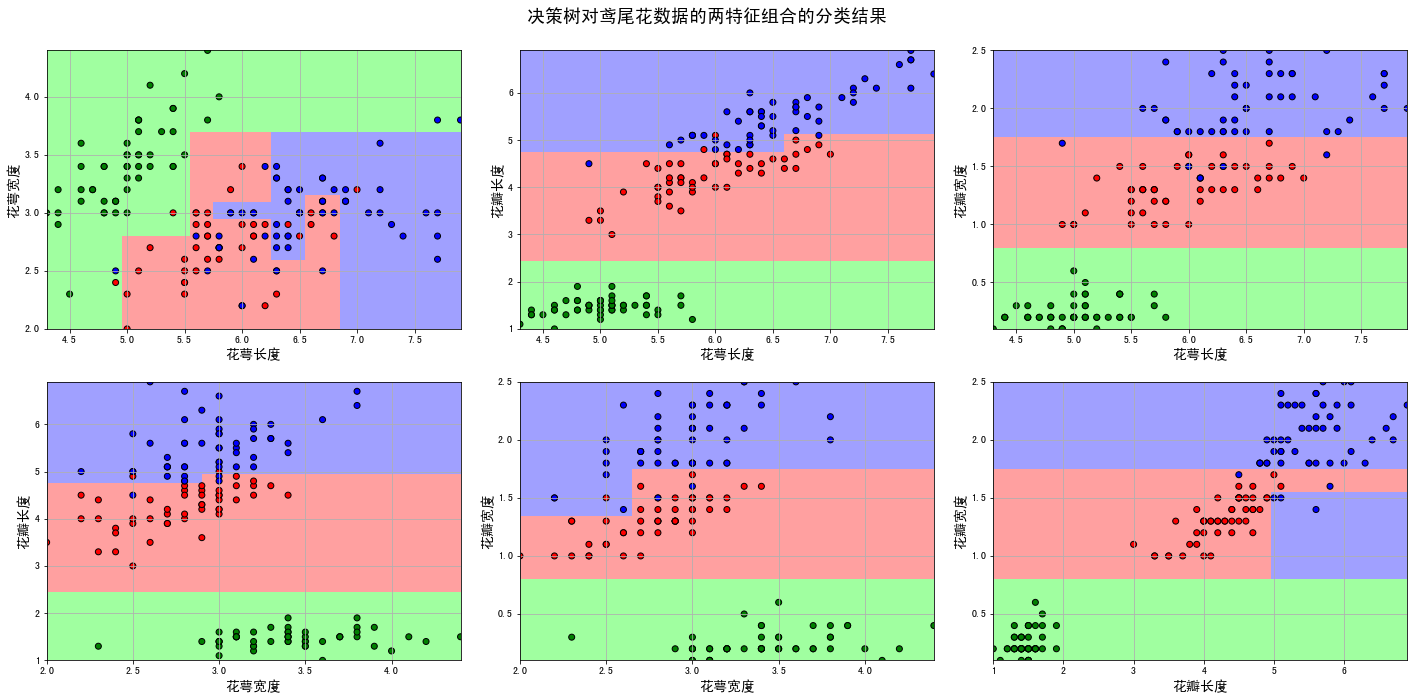

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import os

data_path = os.path.join("data")
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv(os.path.join(data_path, "iris.data"), header=None)
x_prime = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(20, 10), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[pair]

    # 决策树学习
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
    clf.fit(x, y)

    # 画图
    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
    print('特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]],)
    print('\t预测正确数目：', c,)
    print('\t准确率: %.2f%%' % (100 * float(c) / float(len(y))))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.suptitle(u'决策树对鸢尾花数据的两特征组合的分类结果', fontsize=18)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()

# 7.使用决策树进行心形回归

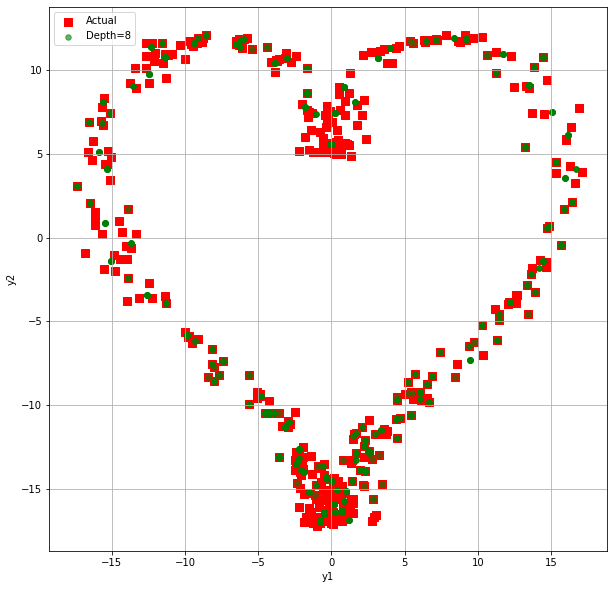

In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import os

data_path = os.path.join("data")
N = 400
x = np.random.rand(N) * 8 - 4     # [-4,4)
x.sort()
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N)
y2 = 13 * np.cos(x) - 5 * np.cos(2*x) - 2 * np.cos(3*x) - np.cos(4*x) + 0.1* np.random.randn(N)
np.set_printoptions(suppress=True)
y = np.vstack((y1, y2)).T
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的

deep = 8
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)

x_test = np.linspace(-4, 4, num=1000).reshape(-1, 1)
y_hat = dt.predict(x_test)
plt.figure(figsize=(10,10), facecolor='w')
plt.scatter(y[:, 0], y[:, 1], c='r', marker='s', s=60, label='Actual')
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='o', edgecolors='g', s=30, label='Depth=%d' % deep, alpha=0.6)
plt.legend(loc='upper left')
plt.xlabel('y1')
plt.ylabel('y2')
plt.grid()

# 8.使用Python Code实现决策树

In [2]:
import numpy as np
import math

class DecisionNode():
    def __init__(self, feature_i=None, threshold=None,value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i
        self.threshold = threshold
        self.value = value
        self.true_branch = true_branch
        self.false_branch = false_branch


class DecisionTree(object):
    def __init__(self, min_samples_split=2, min_impurity=1e-7,max_depth=float("inf"), loss=None):
        self.root = None  #根节点
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        # 计算值 如果是分类问题就是信息增益，回归问题就基尼指数
        self._impurity_calculation = None
        self._leaf_value_calculation = None #计算叶子
        self.one_dim = None
        self.loss = loss

    def fit(self, X, y, loss=None):
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None

    def _build_tree(self, X, y, current_depth=0):
        """
        递归求解树
        """
        largest_impurity = 0
        best_criteria = None
        best_sets = None

        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # 计算每一个特征的增益值
            for feature_i in range(n_features):
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                for threshold in unique_values:
                    Xy1, Xy2 = self.divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # 计算增益值
                        impurity = self._impurity_calculation(y, y1, y2)

                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],
                                "lefty": Xy1[:, n_features:],
                                "rightX": Xy2[:, :n_features],
                                "righty": Xy2[:, n_features:]
                            }

        if largest_impurity > self.min_impurity:
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # 计算节点的目标值
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)

    def predict_value(self, x, tree=None):
        """
        预测
        """
        if tree is None:
            tree = self.root

        if tree.value is not None:
            return tree.value

        feature_value = x[tree.feature_i]

        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        return self.predict_value(x, branch)

    def divide_on_feature(self, X, feature_i, threshold):
        split_func = None
        if isinstance(threshold, int) or isinstance(threshold, float):
            split_func = lambda sample: sample[feature_i] >= threshold
        else:
            split_func = lambda sample: sample[feature_i] == threshold

        X_1 = np.array([sample for sample in X if split_func(sample)])
        X_2 = np.array([sample for sample in X if not split_func(sample)])

        return np.array([X_1, X_2])

    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.predict_value(x))
        return y_pred

def calculate_entropy(y):
    log2 = math.log2
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * log2(p)
    return entropy

## 8.1.分类

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class ClassificationTree(DecisionTree):
    def _calculate_information_gain(self, y, y1, y2):
        # 计算信息增益
        p = len(y1) / len(y)
        entropy = calculate_entropy(y)
        info_gain = entropy - p * calculate_entropy(y1) - (1 - p) * calculate_entropy(y2)

        return info_gain

    def _majority_vote(self, y):
        most_common = None
        max_count = 0
        for label in np.unique(y):
            # 投票决定当前的节点为哪一个类
            count = len(y[y == label])
            if count > max_count:
                most_common = label
                max_count = count

        return most_common

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_information_gain
        self._leaf_value_calculation = self._majority_vote
        super(ClassificationTree, self).fit(X, y)


data = datasets.load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
clf = ClassificationTree()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.9833333333333333


## 8.2.回归

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def calculate_variance(X):
    """ Return the variance of the features in dataset X """
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))

    return variance


class RegressionTree(DecisionTree):
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # 使用方差缩减
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)


N = 400
x = np.random.rand(N) * 8 - 4     # [-4,4)
x.sort()
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N)
y2 = 13 * np.cos(x) - 5 * np.cos(2*x) - 2 * np.cos(3*x) - np.cos(4*x) + 0.1* np.random.randn(N)
np.set_printoptions(suppress=True)
y = np.vstack((y1, y2)).T
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = RegressionTree()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


1.3098979767647947
